In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 2: Load Dataset
# We'll use the Breast Cancer dataset available in scikit-learn.
# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Convert to DataFrame for easier analysis
cancer_df = pd.DataFrame(data=np.c_[cancer['data'], cancer['target']],columns=list(cancer['feature_names']) + ['target'])

cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
# Step 3: Split Dataset
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 4: Preprocess Data
# Standardize the features by scaling them.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Step 5: Train the Model
# We'll use the Support Vector Machine (SVM) algorithm with a radial basis function (RBF) kernel.
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [8]:
# Step 6: Make Predictions
# Use the trained model to make predictions on the test set.
y_pred = svm_model.predict(X_test)

In [9]:
# Step 7: Evaluate the Model
# Evaluate the performance of the model using various metrics.
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=cancer.target_names)
print('Classification Report:')
print(class_report)

Accuracy: 0.98
Confusion Matrix:
[[41  2]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



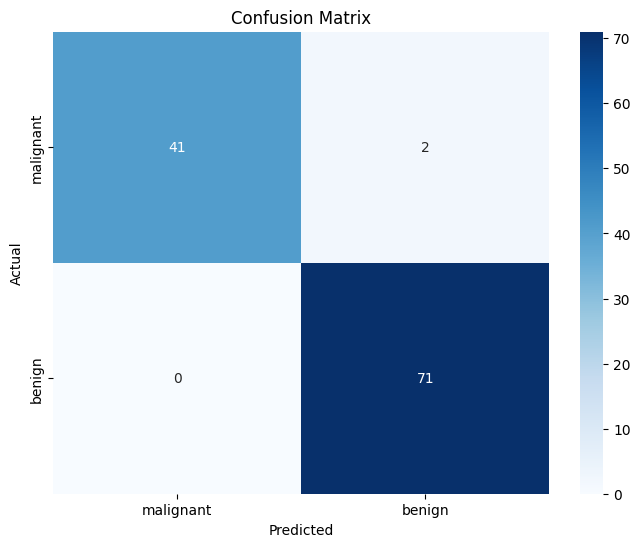

In [10]:
# Step 8: Visualize Results
# Visualize the confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


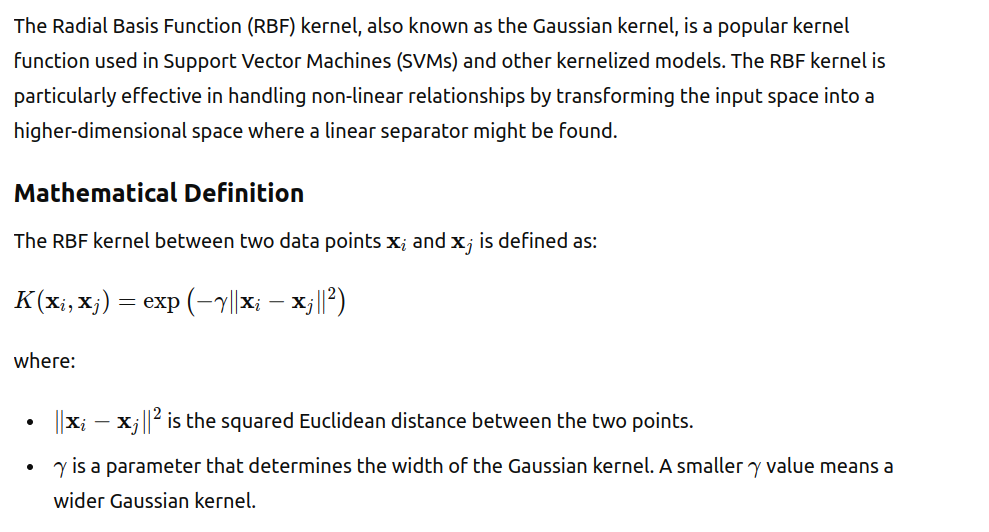

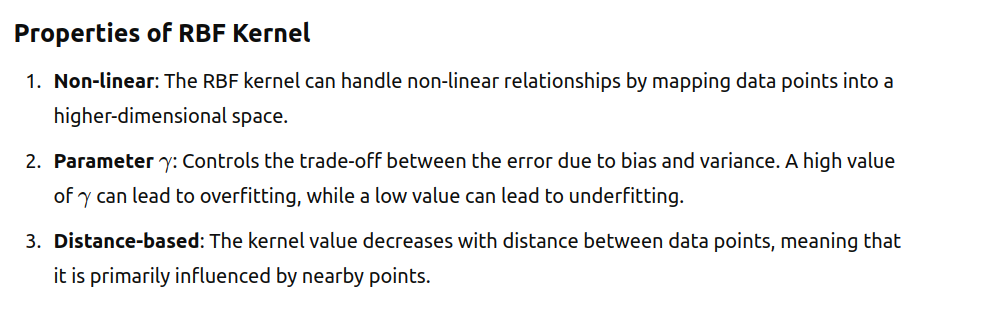